In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

from keras.models import Sequential
from keras import layers
from keras.backend import clear_session
from keras.utils import np_utils
from keras import optimizers
from keras.regularizers import l2

%matplotlib inline


# Technical Challenge - Text classification

Four methods are provided in this code
<ol>
<li>Counter vectorizer</li>
<li>Dimensionality reduction on vetorizers and one-hot encoding </li>
<li>Word embedding and neural networks</li>
<li>Use pre-trained embedding</li>
</ol>

<ul>
<li>Due to the time limit, the neural network based approaches has only been trained by 10 epochs. </li>
<li>The proper way of doing corss validation is N-fold in this case, which is shown in the Method 1 Counter vectorizer. The rest three has only used random split train/test once, again because of the limited time. </li>
<li>Current neural network based approaches are overfit. Dropout and regularisation are applied, a better neural network structure should be explored, as well as fine tuning the hyperparameters.</li>
</ul>

The potential improments include:
<ol>
<li>Explore more representative text features</li>
<li>Explore different neural network structure</li>
<li>Fine tune neural network parameters </li>
<li>Integrate context information, RNN and LSTM can be used</li>
</ol>
Bare in mind my limited knowledge in NLP. I have completed the task in ~5 hours including reading the fundamental knowledge of NLP, coding and documentation. Plus 1 hours model training time.

In [47]:
# Plot function

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

# Load in data and pre-processing
<ol>
<li>Check data balance </li>
<li>Remove duplication and NaN</li>
<li> Remove non-alphebetic chars</li>
</ol>

In [48]:
#  Read in look up classes
class_names = pd.read_csv('classes (1) (1).txt', sep=" ", header=None)
print(class_names)

                         0
0                  Company
1   EducationalInstitution
2                   Artist
3                  Athlete
4             OfficeHolder
5     MeanOfTransportation
6                 Building
7             NaturalPlace
8                  Village
9                   Animal
10                   Plant
11                   Album
12                    Film
13             WrittenWork


In [49]:
# Read in data(and labels)
df = pd.read_csv('data (2) (1).csv')
print(df.head(10))

   Class                               Name
0      1                   E. D. Abbott Ltd
1      1                     Schwan-Stabilo
2      1                         Q-workshop
3      1  Marvell Software Solutions Israel
4      1        Bergan Mercy Medical Center
5      1                 The Unsigned Guide
6      1                  Rest of the world
7      1                         Globoforce
8      1                          Rompetrol
9      1                    Wave Accounting


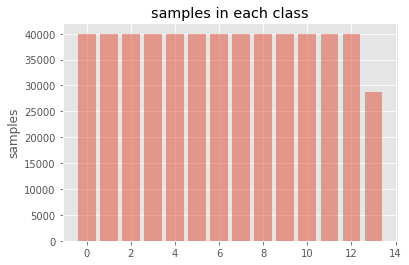

In [50]:
# Check data balance
uniq_val = df['Class'].value_counts()

y_axis = np.arange(len(class_names))

plt.bar(y_axis, uniq_val, align='center', alpha=0.5)
plt.ylabel('samples')
plt.title('samples in each class')

plt.show()

In [51]:
#  Data quality check (remove duplication and NaN)

print(df.drop_duplicates(subset=['Name'], keep=False))
print(df['Name'].isnull().sum())

        Class                                     Name
0           1                         E. D. Abbott Ltd
1           1                           Schwan-Stabilo
2           1                               Q-workshop
3           1        Marvell Software Solutions Israel
4           1              Bergan Mercy Medical Center
...       ...                                      ...
548782     14           The Worst Band in the Universe
548783     14                    Poor Arnold's Almanac
548784     14  The Girls' Guide to Hunting and Fishing
548785     14       Wash This Blood Clean from My Hand
548786     14       Virginia Environmental Law Journal

[548787 rows x 2 columns]
0


In [52]:
# Remove non-alphebetic chars
df['Name'] = df.Name.str.replace(r'[^a-zA-Z ]\s?',r'',regex=True)

# Method 1 Counter vectorizer 
<ul>
<li>BOW model to vectorize the words with Naive Bayes classifier </li>
<li>Pro: fast compute, fairly good results in this task.  </li>
<li>Con: represent a whole sequence of words as a single feature vector</li>
</ul>




In [53]:
X = df['Name']
y = df['Class']

# Apply 10-fold Cross Validation

kf = StratifiedKFold(n_splits=10)
kf.get_n_splits(X)


# Training/Testing
i = 0
y_pred_all = []
y_test_all = []
for train_index, test_index in kf.split(X, y):
    
    print("Train fold " + str(i))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]    
    
    
    vectorizer = CountVectorizer(stop_words='english').fit(X_train)
    X_train = vectorizer.transform(X_train)
    X_test = vectorizer.transform(X_test)
    
    
    #     Training
    clf = MultinomialNB()
    clf.fit(X_train, y_train)
        
    #     Testing     
    y_pred = clf.predict(X_test)
        
    y_pred_all = np.append(y_pred_all, y_pred)
    y_test_all = np.append(y_test_all, y_test)
    
    #     Testing on the training data, check overfit/underfit 
    y_pred_trn = clf.predict(X_train)
    
    print('Test(Acc) = '+ str(accuracy_score(y_test, y_pred)))
    print('Train(Acc) = '+ str(accuracy_score(y_train, y_pred_trn)))
    
    i = i+1

Train fold 0
Test(Acc) = 0.68603655314419
Train(Acc) = 0.8712310794722904
Train fold 1
Test(Acc) = 0.6800233240401611
Train(Acc) = 0.8713323129003782
Train fold 2
Test(Acc) = 0.6787113467811002
Train(Acc) = 0.8715793224649125
Train fold 3
Test(Acc) = 0.6796588859126442
Train(Acc) = 0.8716724572187533
Train fold 4
Test(Acc) = 0.6813899670183494
Train(Acc) = 0.87144974367696
Train fold 5
Test(Acc) = 0.6788389001257311
Train(Acc) = 0.8713647075973663
Train fold 6
Test(Acc) = 0.6805699812314364
Train(Acc) = 0.8710184892733059
Train fold 7
Test(Acc) = 0.6773934910164364
Train(Acc) = 0.8713224500869593
Train fold 8
Test(Acc) = 0.6806734939319946
Train(Acc) = 0.8710673423646866
Train fold 9
Test(Acc) = 0.6800357155873027
Train(Acc) = 0.8712839814621722


Overall accuracy score:  0.68033317115748


<AxesSubplot:>

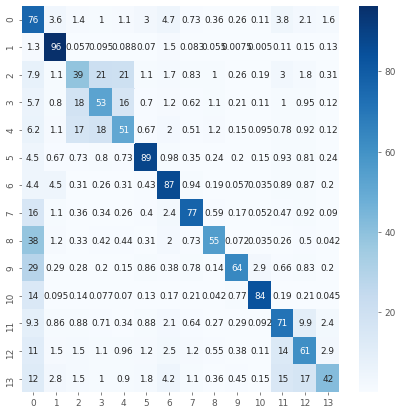

In [54]:
# Visulisation results
import seaborn as sns

print("Overall accuracy score: ", str(accuracy_score(y_test_all, y_pred_all)))

cf_matrix = confusion_matrix(y_test_all, y_pred_all)

plt.figure(dpi=64, figsize=(8, 8))

cmn = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] *100

sns.heatmap(cmn, annot=True, cmap='Blues')


# Method 2 Dimensionality reduction on features with One-hot encoding
<ul>
<li>Reduce the high dimensional feature vector by SVD. One hot encoding for the labels </li>
</ul>


In [55]:
X = df['Name']
y = df['Class']


# Label encoder
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
y = np_utils.to_categorical(encoded_Y)


# Use CountVectorizer
vectorizer = CountVectorizer(stop_words='english').fit(X)
X = vectorizer.transform(X)

print('original shape: ', str(X.shape))

original shape:  (548787, 308054)


In [56]:
import os

if os.path.isfile('Data_svd.npy.npz'):
    data = np.load('Data_svd.npy.npz')
    X = data['X']
    y = data['y']
    
else:
    # Dimensionality reduction (SLOW!!)
    from sklearn.decomposition import TruncatedSVD
    svd = TruncatedSVD(5000)
    X = svd.fit_transform(X)

    print('shape after SVD: ', str(X.shape))

    np.savez('Data_svd.npy', X = X, y = y)

print('Reduced shape: ', str(X.shape))

Reduced shape:  (548787, 5000)


In [57]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [58]:
#  Start training here
clear_session()


input_dim = X_train.shape[1]  # Number of features
print(input_dim)

model = Sequential()

model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(14, activation='softmax'))


initial_learning_rate = 0.01
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True)

opt = optimizers.Adam(learning_rate=lr_schedule)


model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()


history = model.fit(X_train, y_train, 
                    epochs=10,
                    validation_split=0.1,
#                     validation_data=(X_test, y_test), 
                    batch_size=128)

5000
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320064    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 14)                910       
Total params: 325,134
Trainable params: 325,134
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3859/3859 [==============================] - 12s 3ms/step - loss: 1.2971 - accuracy: 0.5643 - val_loss: 1.0678 - val_accuracy: 0.6272
Epoch 2/10
3859/3859 [==============================] - 11s 3ms/step - loss: 1.0273 - accuracy: 0.6383 - val_loss: 1.0182 - val_accuracy: 0.6405
Epoch 3/10
3859/3859 [==============================] - 11s 3ms/step - loss: 0.9609 -

Testing Accuracy:  0.6527


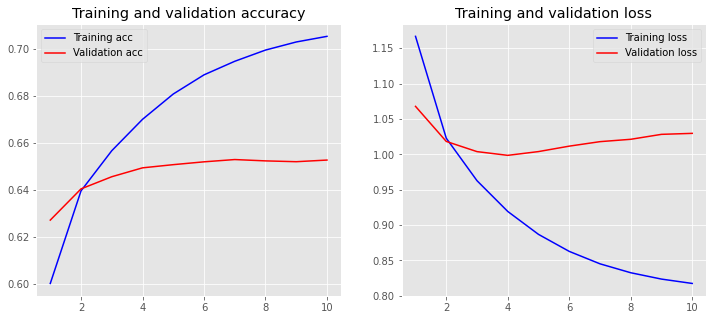

In [59]:
plot_history(history)

# loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
y_pred = model.predict(X_test) 
print("Testing Accuracy:  {:.4f}".format(accuracy))

Overall accuracy score:  0.6382587146267242


<AxesSubplot:>

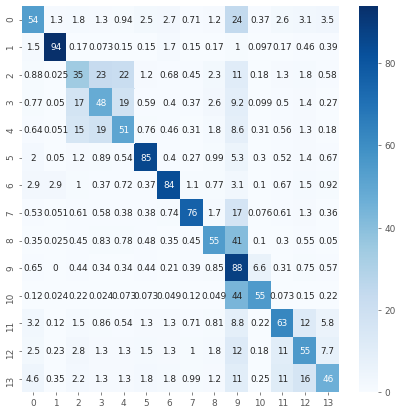

In [60]:
# Visulisation results
import seaborn as sns

y_test_ = np.argmax(y_test, axis=1)
y_pred_ = np.argmax(y_pred, axis=1)


print("Overall accuracy score: ", str(accuracy_score(y_test_, y_pred_)))

cf_matrix = confusion_matrix(y_test_, y_pred_)

plt.figure(dpi=64, figsize=(8, 8))

cmn = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] *100

sns.heatmap(cmn, annot=True, cmap='Blues')

# Method 3 Word embedding and neural networks
<ul>
<li>Reduce the high dimensional feature vector by word embedding. One hot encoding for the labels. This method represents words as dense word vectors, which means that the word embeddings collect more information into fewer dimensions. </li>
</ul>

In [61]:
X = df['Name']
y = df['Class']

# Label encoder
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
y = np_utils.to_categorical(encoded_Y)

# Integer encode the data X
from keras.preprocessing.text import one_hot
vocab_size = 10000
encoded_X = [one_hot(d, vocab_size) for d in X]
print(encoded_X[0:10])

[[3924, 9697], [9302], [9444], [4830, 6847, 7419, 2567], [9396, 4293, 5114, 9976], [4601, 6325, 9324], [6757, 3446, 4601, 8598], [3462], [310], [7801, 4730]]


In [62]:
# pad documents to a max length of n words (n = 5)

# count = df['Name'].str.count(' ') + 1
# np.histogram(count)

from keras.preprocessing.sequence import pad_sequences
max_length = 5
padded_X = pad_sequences(encoded_X, maxlen=max_length, padding='post')
print(padded_X[0:10])

[[3924 9697    0    0    0]
 [9302    0    0    0    0]
 [9444    0    0    0    0]
 [4830 6847 7419 2567    0]
 [9396 4293 5114 9976    0]
 [4601 6325 9324    0    0]
 [6757 3446 4601 8598    0]
 [3462    0    0    0    0]
 [ 310    0    0    0    0]
 [7801 4730    0    0    0]]


In [63]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(padded_X, y, test_size=0.1)

In [64]:
clear_session()


model = Sequential()
model.add(layers.Embedding(vocab_size, 2048, input_length=max_length))
# model.add(layers.Flatten())
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(512, activation='relu',kernel_regularizer=l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(layers.Dense(14, activation='softmax'))

initial_learning_rate = 0.01
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True)

opt = optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_split=0.1,
#                     validation_data=(X_test, y_test),
                    batch_size=512)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5, 2048)           20480000  
_________________________________________________________________
global_max_pooling1d (Global (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

Testing Accuracy:  0.5371


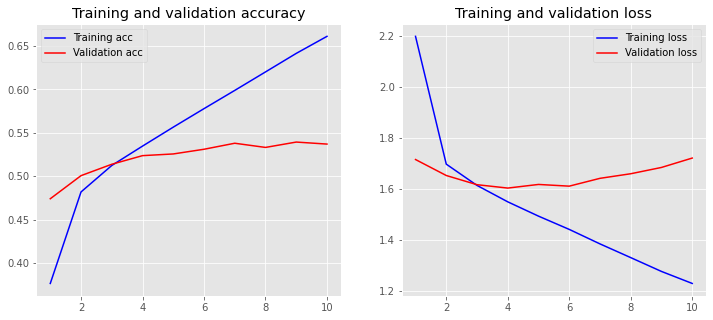

In [65]:
plot_history(history)

# loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
y_pred = model.predict(X_test) 
print("Testing Accuracy:  {:.4f}".format(accuracy))

Overall accuracy score:  0.5370542466152809


<AxesSubplot:>

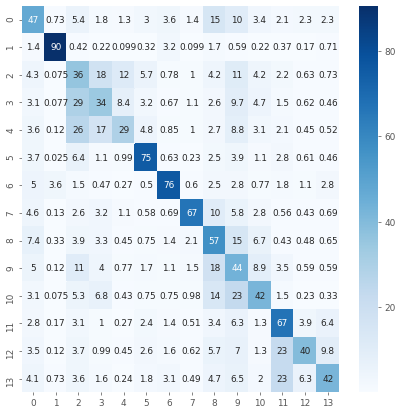

In [66]:
# Visulisation results
import seaborn as sns

y_test_ = np.argmax(y_test, axis=1)
y_pred_ = np.argmax(y_pred, axis=1)


print("Overall accuracy score: ", str(accuracy_score(y_test_, y_pred_)))

cf_matrix = confusion_matrix(y_test_, y_pred_)

plt.figure(dpi=64, figsize=(8, 8))

cmn = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] *100

sns.heatmap(cmn, annot=True, cmap='Blues')



# Method 4 Pre-trained embedding
<ul>
<li>Similar idea as in Method 3, but with pre-computed GloVe word embeddings  </li>
<li>allow the embedding to be updated during training</li>
</ul>

In [67]:
X = df['Name']
y = df['Class']

# Label encoder
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
y = np_utils.to_categorical(encoded_Y)

# prepare tokenizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


t = Tokenizer()
t.fit_on_texts(X)
vocab_size = len(t.word_index) + 1

# integer encode the documents
encoded_X = t.texts_to_sequences(X)
print(encoded_X[0:10])
# pad documents to a max length of 5 words
max_length = 5
padded_X = pad_sequences(encoded_X, maxlen=max_length, padding='post')
print(padded_X[0:10])

[[84925, 822], [84926], [84927], [29307, 390, 1275, 1042], [50520, 1847, 130, 54], [1, 50521, 1045], [3377, 2, 1, 84], [84928], [84929], [2220, 8847]]
[[84925   822     0     0     0]
 [84926     0     0     0     0]
 [84927     0     0     0     0]
 [29307   390  1275  1042     0]
 [50520  1847   130    54     0]
 [    1 50521  1045     0     0]
 [ 3377     2     1    84     0]
 [84928     0     0     0     0]
 [84929     0     0     0     0]
 [ 2220  8847     0     0     0]]


In [68]:
# load the whole embedding into memory
# model 'glove.6B.50d.txt' can be downloaded from https://nlp.stanford.edu/projects/glove/
embeddings_index = dict()
f = open('glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [69]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 50))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [70]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(padded_X, y, test_size=0.1)

In [71]:
clear_session()
from keras.regularizers import l2

# define model
model = Sequential()
model.add(layers.Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=5, trainable=True))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(layers.Dense(14, activation='softmax'))


initial_learning_rate = 0.01
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=5000,
    decay_rate=0.9,
    staircase=True)

opt = optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_split=0.1,
#                     validation_data=(X_test, y_test),
                    batch_size=512)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5, 50)             15418450  
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 128)            32128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 14)                462       
Total params: 15,455,168
Trainable params: 15,455,168
Non-trainable params: 0
____________________________________________

Testing Accuracy:  0.7011


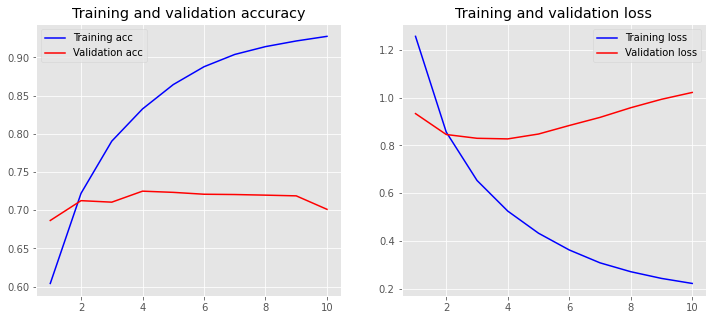

In [72]:
plot_history(history)

# loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
y_pred = model.predict(X_test) 
print("Testing Accuracy:  {:.4f}".format(accuracy))

Overall accuracy score:  0.7011060697170138


<AxesSubplot:>

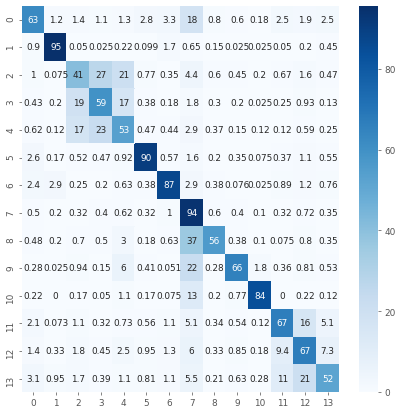

In [73]:
# Visulisation results
import seaborn as sns

y_test_ = np.argmax(y_test, axis=1)
y_pred_ = np.argmax(y_pred, axis=1)


print("Overall accuracy score: ", str(accuracy_score(y_test_, y_pred_)))

cf_matrix = confusion_matrix(y_test_, y_pred_)

plt.figure(dpi=64, figsize=(8, 8))

cmn = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] *100

sns.heatmap(cmn, annot=True, cmap='Blues')

